In [64]:
import pandas as pd
from fileio import load_data, convert_df_to_vw
from Expert import Expert
import matplotlib.pyplot as plt
from constants import SPAMBASE, CLOUD, SPAMBASE_LABEL_COL_NAME, CLOUD_LABEL_COL_NAME

In [65]:
df: pd.DataFrame; features: list[str]; training_examples: list[str]
dataset: str = SPAMBASE
label_name: str = SPAMBASE_LABEL_COL_NAME if dataset == SPAMBASE else CLOUD_LABEL_COL_NAME
df, features = load_data(dataset)
training_examples = convert_df_to_vw(df, features, label_name=label_name)

In [66]:
learning_rate: float = 0.5
expert: Expert = Expert(features=features, learning_rate=learning_rate)

In [67]:
for ex in training_examples:
    expert.learn(ex)

In [68]:
logs: list[str]; history: pd.DataFrame
logs, history = expert.get_log()

In [69]:
weight_df: pd.DataFrame = expert.get_weight_history()
weight_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,-0.543451,-0.271001,0.0,0.000000,0.000000,0.0,-0.043951,-0.009891,-0.001570
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-0.055488,...,0.0,-0.543451,-0.271001,0.0,-0.318197,0.000000,0.0,-0.077579,-0.017761,-0.002069
2,0.0,0.0,0.0,0.0,0.000000,0.195873,0.0,0.097936,0.195873,-0.028300,...,0.0,-0.543451,-0.271001,0.0,-0.006578,0.256663,0.0,-0.013412,-0.000599,0.000006
3,0.0,0.0,0.0,0.0,0.019961,0.195873,0.0,0.097936,0.195873,-0.028300,...,0.0,-0.543451,0.060480,0.0,-0.006578,0.256663,0.0,-0.007325,-0.000583,0.000016
4,0.0,0.0,0.0,0.0,0.019961,0.195873,0.0,0.097936,0.195873,-0.028300,...,0.0,-0.543451,-0.049973,0.0,-0.006578,0.256663,0.0,-0.020058,-0.000811,-0.000049


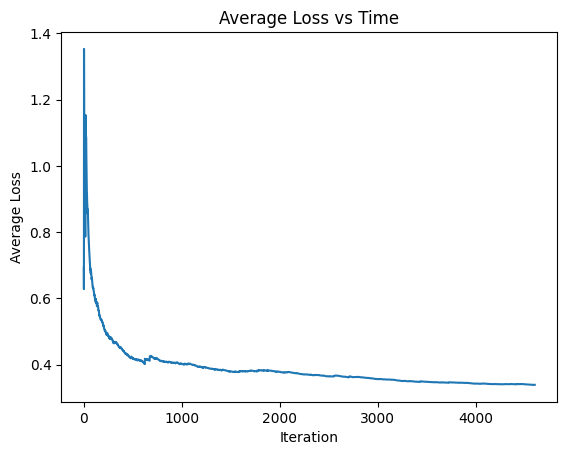

In [70]:
plt.plot(history.index, history['average loss'])
plt.title("Average Loss vs Time")
plt.xlabel("Iteration")
plt.ylabel("Average Loss")
plt.show()

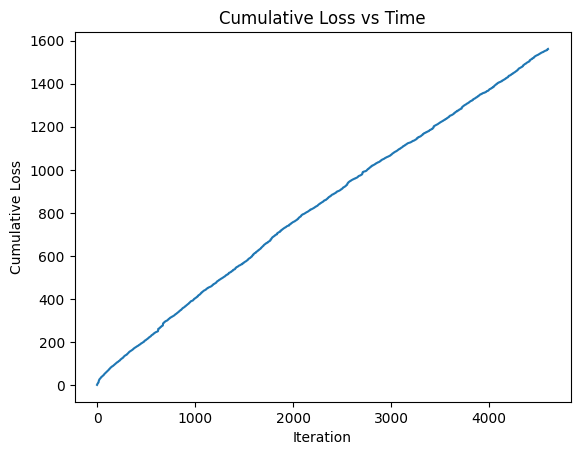

In [71]:
plt.plot(history.index, history['cumulative loss'])
plt.title("Cumulative Loss vs Time")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Loss")
plt.show()

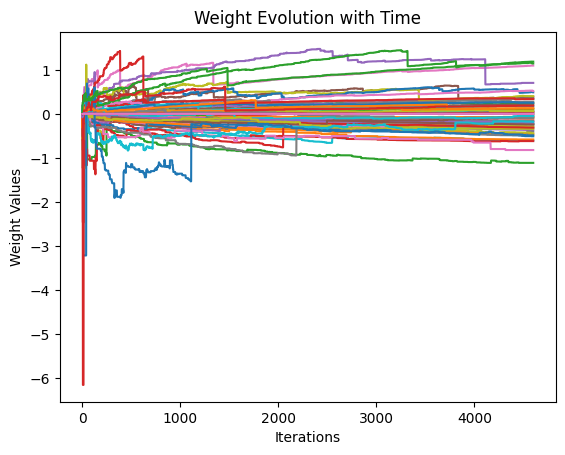

In [72]:
for col in weight_df.columns:
    plt.plot(history.index, weight_df[col])
plt.title("Weight Evolution with Time")
plt.xlabel("Iterations")
plt.ylabel("Weight Values")
plt.show()

In [73]:
print(f"Final average loss value {history.iloc[-1]['average loss']}")

Final average loss value 0.339412662545411
